In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from constraint import Problem


# Step 1: Load GeoJSON map data
file_path = './hk_map.geojson'  # 替换为实际路径
map_data = gpd.read_file(file_path)

# Step 2: Create adjacency list
adjacency = {name: [] for name in map_data['name']}

for i, region in map_data.iterrows():
    for j, neighbor in map_data.iterrows():
        if i != j and region['geometry'].intersects(neighbor['geometry']):
            adjacency[region['name']].append(neighbor['name'])

print(adjacency)


{'北区': ['大埔区', '元朗区'], '大埔区': ['北区', '西贡区', '沙田区', '元朗区', '荃湾区'], '西贡区': ['大埔区', '沙田区', '黄大仙区', '观塘区'], '沙田区': ['大埔区', '西贡区', '黄大仙区', '九龙城区', '深水埗区', '荃湾区', '葵青区'], '离岛区': ['荃湾区'], '南区': ['东区', '中西区', '湾仔区'], '屯门区': ['元朗区', '荃湾区'], '黄大仙区': ['西贡区', '沙田区', '九龙城区', '观塘区'], '九龙城区': ['沙田区', '黄大仙区', '深水埗区', '观塘区', '油尖旺区', '东区'], '深水埗区': ['沙田区', '九龙城区', '油尖旺区', '葵青区'], '观塘区': ['西贡区', '黄大仙区', '九龙城区', '东区'], '油尖旺区': ['九龙城区', '深水埗区', '东区', '中西区', '湾仔区', '葵青区'], '东区': ['南区', '九龙城区', '观塘区', '油尖旺区', '湾仔区'], '中西区': ['南区', '油尖旺区', '湾仔区', '葵青区'], '湾仔区': ['南区', '油尖旺区', '东区', '中西区'], '元朗区': ['北区', '大埔区', '屯门区', '荃湾区'], '荃湾区': ['大埔区', '沙田区', '离岛区', '屯门区', '元朗区', '葵青区'], '葵青区': ['沙田区', '深水埗区', '油尖旺区', '中西区', '荃湾区']}


In [11]:
mapping = {
    '北区': 'A', '大埔区': 'B', '西贡区': 'C', '沙田区': 'D',
    '离岛区': 'E', '南区': 'F', '屯门区': 'G', '黄大仙区': 'H',
    '九龙城区': 'I', '深水埗区': 'J', '观塘区': 'K', '油尖旺区': 'L',
    '东区': 'M', '中西区': 'N', '湾仔区': 'O', '元朗区': 'P', '荃湾区': 'Q',
    '葵青区': 'R'
}

# 替换邻接表
adjacency_mapped = {}
for key, neighbors in adjacency.items():
    new_key = mapping[key]
    new_neighbors = [mapping[neighbor] for neighbor in neighbors]
    adjacency_mapped[new_key] = new_neighbors

# Step 3: Solve CSP for region coloring
problem = Problem()
colors = ['Red', 'Green', 'Blue', 'Yellow']
for region in adjacency_mapped.keys():
    problem.addVariable(region, colors)
for region, neighbors in adjacency_mapped.items():
    for neighbor in neighbors:
        problem.addConstraint(lambda a, b: a != b, (region, neighbor))
solutions = problem.getSolutions()

if solutions:
    print("Solution found:", solutions[0])
    region_colors = solutions[0]
else:
    print("No solution found.")
    region_colors = {region: "gray" for region in adjacency_mapped.keys()}


Solution found: {'D': 'Yellow', 'I': 'Blue', 'L': 'Yellow', 'Q': 'Blue', 'B': 'Green', 'M': 'Green', 'R': 'Green', 'J': 'Red', 'C': 'Blue', 'H': 'Green', 'K': 'Yellow', 'N': 'Blue', 'O': 'Red', 'P': 'Yellow', 'F': 'Yellow', 'A': 'Blue', 'G': 'Green', 'E': 'Yellow'}


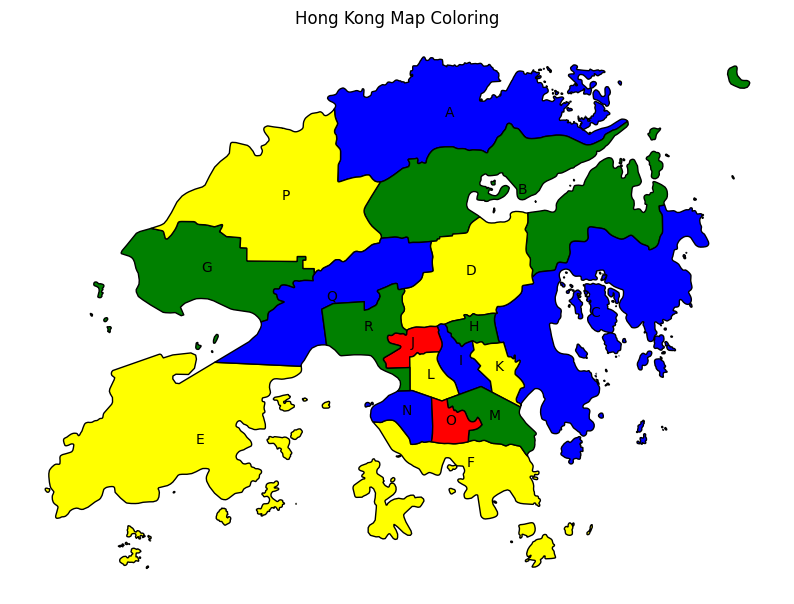

In [12]:
# 将中文名称替换为英文字母
map_data['name'] = map_data['name'].map(mapping)

# Add a 'color' column to the map_data DataFrame based on region_colors
map_data['color'] = map_data['name'].map(region_colors).fillna("gray")

# Step 4: Visualize the map with colored regions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the map with colors
map_data.plot(ax=ax, color=map_data['color'], edgecolor='black')

# Add region names (A-R) to the map
for _, row in map_data.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], fontsize=10, ha='center')

plt.title("Hong Kong Map Coloring")
plt.axis('off')
plt.show()
